In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Importing datasets

In [2]:
df_trts = pd.read_csv('train_time_series.csv')

In [3]:
df_trl = pd.read_csv('train_labels.csv')

# Merging Datasets based on timestamp

In [4]:
df = pd.merge(df_trl,df_trts, on=['timestamp'])

In [5]:
df.head()

,Unnamed: 0_x,timestamp,UTC time_x,label,Unnamed: 0_y,UTC time_y,accuracy,x,y,z
0,20589,1565109931087,2019-08-06T16:45:31.087,1,20589,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
1,20599,1565109932090,2019-08-06T16:45:32.090,1,20599,2019-08-06T16:45:32.090,unknown,0.013718,-0.852371,-0.000870
2,20609,1565109933092,2019-08-06T16:45:33.092,1,20609,2019-08-06T16:45:33.092,unknown,0.145584,-1.007843,-0.036819
3,20619,1565109934094,2019-08-06T16:45:34.094,1,20619,2019-08-06T16:45:34.094,unknown,-0.099380,-1.209686,0.304489
4,20629,1565109935097,2019-08-06T16:45:35.097,1,20629,2019-08-06T16:45:35.097,unknown,0.082794,-1.001434,-0.025375


# Keeping only useful columns

In [6]:
df = df[['timestamp','label','x','y','z']]

In [7]:
df.shape

(375, 5)

In [8]:
df.isnull().sum()

timestamp    0
label        0
x            0
y            0
z            0
dtype: int64

In [14]:
#merge dataframe
df3 = pd.merge(df_trts,df_trl, on=['timestamp'], how = 'left')

In [15]:
#filling label gaps
df3['label']=df3['label'].where(df3['label'].notnull(), other=(df3['label'].fillna(method='ffill')+df3['label'].fillna(method='bfill'))/2)

In [19]:
#keeping useful columns and deleting rows with uncertain label 
df3 = df3[['timestamp','x','y','z','label']]
df3.label = df3['label'].replace([1.5,2.5,3.5],np.nan)
df3 = df3.dropna()
#calculating acceleration to independize from accelerometer orientation
df3['acceleration'] = (df3.x**2 + df3.y**2 + df3.z**2)**0.5

In [25]:
df3l1 = df3.loc[5:75]
df3l1.head()

,timestamp,x,y,z,label,acceleration
5,1565109931288,-0.010880,-0.967575,0.170898,1.0,0.982612
6,1565109931388,0.052841,-0.982330,0.235565,1.0,1.011561
7,1565109931488,0.032974,-1.053207,0.256714,1.0,1.084544
8,1565109931589,-0.090424,-0.972794,0.356308,1.0,1.039932
9,1565109931689,0.124268,-0.890533,0.223221,1.0,0.926455


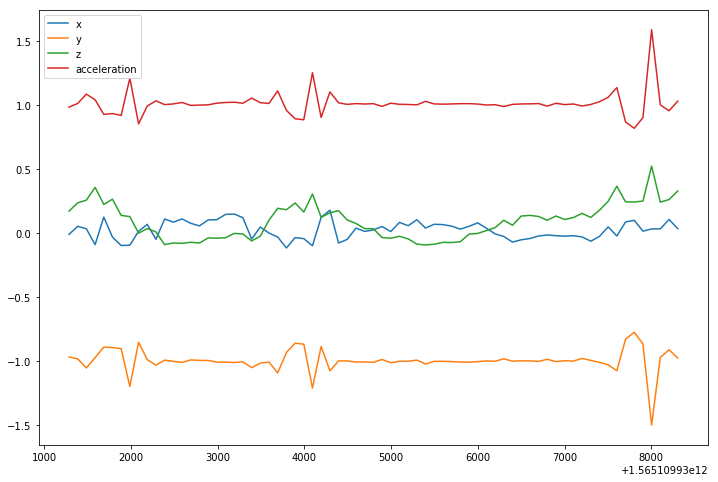

In [26]:
#plotting label1 sample to see pattern
plt.figure(figsize=(12,8))
plt.plot(df3l1.timestamp,df3l1.x)
plt.plot(df3l1.timestamp,df3l1.y)
plt.plot(df3l1.timestamp,df3l1.z)
plt.plot(df3l1.timestamp,df3l1.acceleration)
plt.legend()
plt.show()

In [ ]:
df3.head()

In [29]:
df3l2 = df3.loc[85:155]
df3l2.tail()

,timestamp,x,y,z,label,acceleration
151,1565109945921,0.990189,-1.346603,-0.018295,2.0,1.671571
152,1565109946022,-0.043243,-0.893326,-0.149338,2.0,0.906754
153,1565109946122,0.083878,-0.950729,-0.048096,2.0,0.955633
154,1565109946222,0.535095,-1.015015,0.163803,2.0,1.159057
155,1565109946322,-0.114365,-1.242584,0.291733,2.0,1.281485


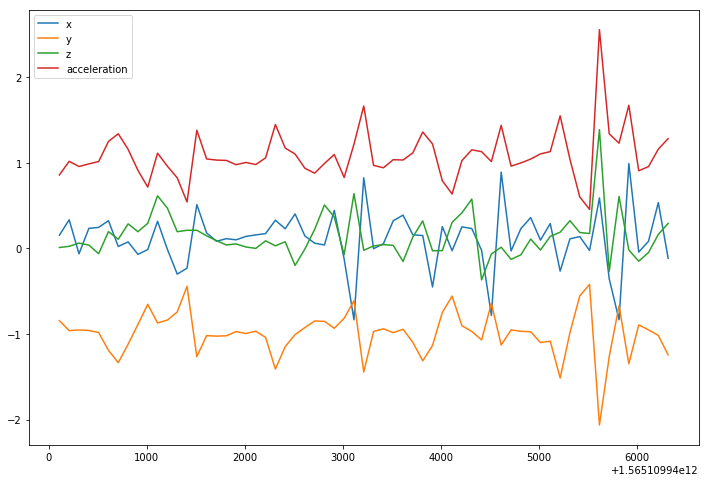

In [30]:
plt.figure(figsize=(12,8))
plt.plot(df3l2.timestamp,df3l2.x)
plt.plot(df3l2.timestamp,df3l2.y)
plt.plot(df3l2.timestamp,df3l2.z)
plt.plot(df3l2.timestamp,df3l2.acceleration)
plt.legend()
plt.show()

In [39]:
df3l3 = df3.loc[1582:1652]
df3l3.tail(10)

,timestamp,x,y,z,label,acceleration
1643,1565110095556,0.660507,-1.447128,-0.050140,3.0,1.591529
1644,1565110095656,-0.065506,-0.916504,-0.087997,3.0,0.923046
1645,1565110095757,-0.009079,-0.939835,0.102600,3.0,0.945462
1646,1565110095857,0.394699,-0.968445,-0.106644,3.0,1.051212
1647,1565110095957,0.081100,-1.137604,0.224625,3.0,1.162401
1648,1565110096057,0.484192,-1.096329,0.321594,3.0,1.240887
1649,1565110096158,-0.597107,-1.384003,-0.214615,3.0,1.522518
1650,1565110096258,0.126816,-0.877090,0.094376,3.0,0.891222
1651,1565110096358,-0.079254,-0.415359,0.129166,3.0,0.442141
1652,1565110096458,0.275269,-0.652176,0.323212,3.0,0.778185


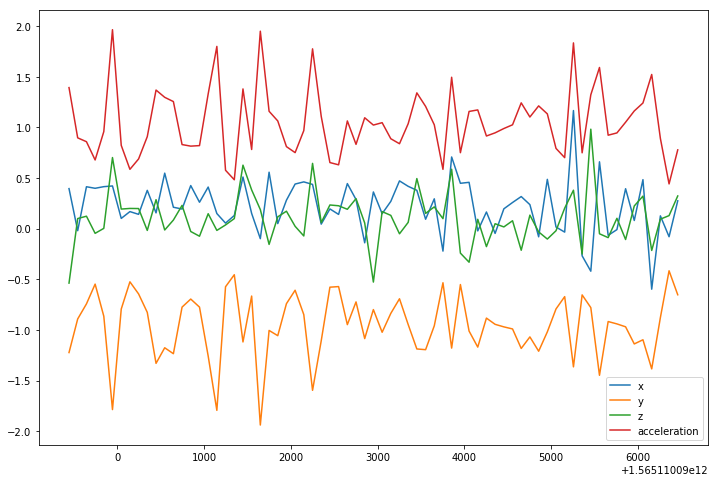

In [40]:
plt.figure(figsize=(12,8))
plt.plot(df3l3.timestamp,df3l3.x)
plt.plot(df3l3.timestamp,df3l3.y)
plt.plot(df3l3.timestamp,df3l3.z)
plt.plot(df3l3.timestamp,df3l3.acceleration)
plt.legend()
plt.show()

In [41]:
df3l4 = df3.loc[961:1031]
df3l4.head(20)

,timestamp,x,y,z,label,acceleration
961,1565110027107,-0.209259,-1.027649,-0.152679,2.0,1.059794
962,1565110027207,0.256180,-0.961060,-0.075882,2.0,0.997508
963,1565110027307,0.096832,-1.050201,-0.006042,2.0,1.054673
964,1565110027407,0.159668,-0.936996,-0.057343,3.0,0.952231
965,1565110027508,0.232162,-0.956436,0.016586,3.0,0.984350
966,1565110027608,0.166428,-0.953629,-0.030334,3.0,0.968517
967,1565110027708,0.320312,-0.939697,-0.070023,3.0,0.995256
968,1565110027808,0.250458,-1.226395,0.239426,3.0,1.274401
969,1565110027909,-0.451660,-1.139252,0.127563,3.0,1.232138
970,1565110028009,0.503296,-0.866394,0.189575,3.0,1.019747


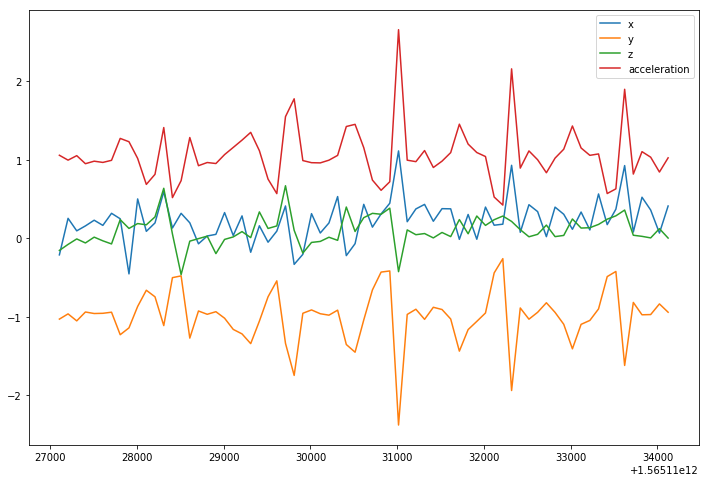

In [42]:
plt.figure(figsize=(12,8))
plt.plot(df3l4.timestamp,df3l4.x)
plt.plot(df3l4.timestamp,df3l4.y)
plt.plot(df3l4.timestamp,df3l4.z)
plt.plot(df3l4.timestamp,df3l4.acceleration)
plt.legend()
plt.show()

In [43]:
i = 0
j= 10
movelet_l1x = []
for n in range(30):
    movelet_l1x.append(df3l1.x[i:j])
    i+=1
    j+=1


In [45]:
len(movelet_l1x)

30

In [52]:
columns = ['x','y','z','acceleration']
movelet_dictionary_l1 =pd.DataFrame(columns = columns)
for c in columns:
    i = 0
    j = 10
    movelet_column = []
    for n in range(50):
        movelet_column.append(df3l1[c][i:j])
        i+=1
        j+=1
    movelet_dictionary_l1[c] = movelet_column
        

In [53]:
movelet_dictionary_l1

,x,y,z,acceleration
0,5 -0.010880 6 0.052841 7 0.032974 8...,5 -0.967575 6 -0.982330 7 -1.053207 8...,5 0.170898 6 0.235565 7 0.256714 8...,5 0.982612 6 1.011561 7 1.084544 8...
1,6 0.052841 7 0.032974 8 -0.090424 9...,6 -0.982330 7 -1.053207 8 -0.972794 9...,6 0.235565 7 0.256714 8 0.356308 9...,6 1.011561 7 1.084544 8 1.039932 9...
2,7 0.032974 8 -0.090424 9 0.124268 1...,7 -1.053207 8 -0.972794 9 -0.890533 1...,7 0.256714 8 0.356308 9 0.223221 1...,7 1.084544 8 1.039932 9 0.926455 1...
3,8 -0.090424 9 0.124268 10 -0.031784 1...,8 -0.972794 9 -0.890533 10 -0.893982 1...,8 0.356308 9 0.223221 10 0.264236 1...,8 1.039932 9 0.926455 10 0.932757 1...
4,9 0.124268 10 -0.031784 11 -0.097427 1...,9 -0.890533 10 -0.893982 11 -0.902725 1...,9 0.223221 10 0.264236 11 0.137680 1...,9 0.926455 10 0.932757 11 0.918347 1...
5,10 -0.031784 11 -0.097427 12 -0.094864 1...,10 -0.893982 11 -0.902725 12 -1.197876 1...,10 0.264236 11 0.137680 12 0.128494 1...,10 0.932757 11 0.918347 12 1.208477 1...
6,11 -0.097427 12 -0.094864 13 0.013718 1...,11 -0.902725 12 -1.197876 13 -0.852371 1...,11 0.137680 12 0.128494 13 -0.000870 1...,11 0.918347 12 1.208477 13 0.852482 1...
7,12 -0.094864 13 0.013718 14 0.067947 1...,12 -1.197876 13 -0.852371 14 -0.988525 1...,12 0.128494 13 -0.000870 14 0.034973 1...,12 1.208477 13 0.852482 14 0.991475 1...
8,13 0.013718 14 0.067947 15 -0.049255 1...,13 -0.852371 14 -0.988525 15 -1.031082 1...,13 -0.000870 14 0.034973 15 0.008942 1...,13 0.852482 14 0.991475 15 1.032297 1...
9,14 0.067947 15 -0.049255 16 0.109711 1...,14 -0.988525 15 -1.031082 16 -0.992325 1...,14 0.034973 15 0.008942 16 -0.090561 1...,14 0.991475 15 1.032297 16 1.002470 1...


In [70]:
# Define function for creating movelet dictionaries for each label

In [62]:
def movelet_dict_generator (dataframe,columns):
    movelet_dictionary =pd.DataFrame(columns = columns)
    for c in columns:
        i = 0
        j = 10
        movelet_column = []
        for n in range(50):
            movelet_column.append(dataframe[c][i:j])
            i+=1
            j+=1
        movelet_dictionary[c] = movelet_column
    return movelet_dictionary

In [63]:
movelet_dictionary_l2 = movelet_dict_generator(df3l2,['x','y','z','acceleration'])

In [69]:
movelet_dictionary_l3 = movelet_dict_generator(df3l3,['x','y','z','acceleration'])
movelet_dictionary_l4 = movelet_dict_generator(df3l4,['x','y','z','acceleration'])
movelet_dictionary_l1 = movelet_dict_generator(df3l1,['x','y','z','acceleration'])

In [71]:
movelet_dictionary_l1.head()

,x,y,z,acceleration
0,5 -0.010880 6 0.052841 7 0.032974 8...,5 -0.967575 6 -0.982330 7 -1.053207 8...,5 0.170898 6 0.235565 7 0.256714 8...,5 0.982612 6 1.011561 7 1.084544 8...
1,6 0.052841 7 0.032974 8 -0.090424 9...,6 -0.982330 7 -1.053207 8 -0.972794 9...,6 0.235565 7 0.256714 8 0.356308 9...,6 1.011561 7 1.084544 8 1.039932 9...
2,7 0.032974 8 -0.090424 9 0.124268 1...,7 -1.053207 8 -0.972794 9 -0.890533 1...,7 0.256714 8 0.356308 9 0.223221 1...,7 1.084544 8 1.039932 9 0.926455 1...
3,8 -0.090424 9 0.124268 10 -0.031784 1...,8 -0.972794 9 -0.890533 10 -0.893982 1...,8 0.356308 9 0.223221 10 0.264236 1...,8 1.039932 9 0.926455 10 0.932757 1...
4,9 0.124268 10 -0.031784 11 -0.097427 1...,9 -0.890533 10 -0.893982 11 -0.902725 1...,9 0.223221 10 0.264236 11 0.137680 1...,9 0.926455 10 0.932757 11 0.918347 1...


In [72]:
movelet_dictionary_l2.head()

,x,y,z,acceleration
0,93 0.154510 94 0.334381 95 -0.06303...,93 -0.843460 94 -0.960007 95 -0.95217...,93 0.010544 94 0.024582 95 0.06204...,93 0.857560 94 1.016872 95 0.95627...
1,94 0.334381 95 -0.063034 96 0.23399...,94 -0.960007 95 -0.952179 96 -0.95793...,94 0.024582 95 0.062042 96 0.03883...,94 1.016872 95 0.956278 96 0.98686...
2,95 -0.063034 96 0.233994 97 0.24557...,95 -0.952179 96 -0.957932 97 -0.98208...,95 0.062042 96 0.038834 97 -0.06196...,95 0.956278 96 0.986861 97 1.01421...
3,96 0.233994 97 0.245575 98 0.32356...,96 -0.957932 97 -0.982086 98 -1.19041...,96 0.038834 97 -0.061966 98 0.19599...,96 0.986861 97 1.014219 98 1.24907...
4,97 0.245575 98 0.323563 99 0.02265...,97 -0.982086 98 -1.190414 99 -1.33398...,97 -0.061966 98 0.195999 99 0.10714...,97 1.014219 98 1.249078 99 1.33847...


In [73]:
movelet_dictionary_l3.head()

,x,y,z,acceleration
0,1582 0.395767 1583 -0.019714 1584 0.41...,1582 -1.222717 1583 -0.891068 1584 -0.74...,1582 -0.537125 1583 0.100052 1584 0.12...,1582 1.392901 1583 0.896884 1584 0.85...
1,1583 -0.019714 1584 0.414230 1585 0.39...,1583 -0.891068 1584 -0.742172 1585 -0.54...,1583 0.100052 1584 0.123383 1585 -0.04...,1583 0.896884 1584 0.858854 1585 0.67...
2,1584 0.414230 1585 0.398895 1586 0.41...,1584 -0.742172 1585 -0.547028 1586 -0.86...,1584 0.123383 1585 -0.045731 1586 0.00...,1584 0.858854 1585 0.678563 1586 0.95...
3,1585 0.398895 1586 0.415039 1587 0.42...,1585 -0.547028 1586 -0.864029 1587 -1.78...,1585 -0.045731 1586 0.003357 1587 0.70...,1585 0.678563 1586 0.958548 1587 1.96...
4,1586 0.415039 1587 0.421906 1588 0.10...,1586 -0.864029 1587 -1.785599 1588 -0.79...,1586 0.003357 1587 0.702393 1588 0.19...,1586 0.958548 1587 1.964618 1588 0.82...


In [74]:
movelet_dictionary_l4.head()

,x,y,z,acceleration
0,961 -0.209259 962 0.256180 963 0.09683...,961 -1.027649 962 -0.961060 963 -1.05020...,961 -0.152679 962 -0.075882 963 -0.00604...,961 1.059794 962 0.997508 963 1.05467...
1,962 0.256180 963 0.096832 964 0.15966...,962 -0.961060 963 -1.050201 964 -0.93699...,962 -0.075882 963 -0.006042 964 -0.05734...,962 0.997508 963 1.054673 964 0.95223...
2,963 0.096832 964 0.159668 965 0.23216...,963 -1.050201 964 -0.936996 965 -0.95643...,963 -0.006042 964 -0.057343 965 0.01658...,963 1.054673 964 0.952231 965 0.98435...
3,964 0.159668 965 0.232162 966 0.16642...,964 -0.936996 965 -0.956436 966 -0.95362...,964 -0.057343 965 0.016586 966 -0.03033...,964 0.952231 965 0.984350 966 0.96851...
4,965 0.232162 966 0.166428 967 0.32031...,965 -0.956436 966 -0.953629 967 -0.93969...,965 0.016586 966 -0.030334 967 -0.07002...,965 0.984350 966 0.968517 967 0.99525...


In [75]:
movelet_dictionary_l1['label'] = 1
movelet_dictionary_l2['label'] = 2
movelet_dictionary_l3['label'] = 3
movelet_dictionary_l4['label'] = 4


In [84]:
movelet_dictionary_l1.x[0]

5    -0.010880
6     0.052841
7     0.032974
8    -0.090424
9     0.124268
10   -0.031784
11   -0.097427
12   -0.094864
13    0.013718
14    0.067947
Name: x, dtype: float64

In [85]:
movelet_dict = pd.concat([movelet_dictionary_l1,movelet_dictionary_l2,movelet_dictionary_l3,movelet_dictionary_l4], axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [86]:
movelet_dict


,x,y,z,acceleration,label
0,5 -0.010880 6 0.052841 7 0.032974 8...,5 -0.967575 6 -0.982330 7 -1.053207 8...,5 0.170898 6 0.235565 7 0.256714 8...,5 0.982612 6 1.011561 7 1.084544 8...,1
1,6 0.052841 7 0.032974 8 -0.090424 9...,6 -0.982330 7 -1.053207 8 -0.972794 9...,6 0.235565 7 0.256714 8 0.356308 9...,6 1.011561 7 1.084544 8 1.039932 9...,1
2,7 0.032974 8 -0.090424 9 0.124268 1...,7 -1.053207 8 -0.972794 9 -0.890533 1...,7 0.256714 8 0.356308 9 0.223221 1...,7 1.084544 8 1.039932 9 0.926455 1...,1
3,8 -0.090424 9 0.124268 10 -0.031784 1...,8 -0.972794 9 -0.890533 10 -0.893982 1...,8 0.356308 9 0.223221 10 0.264236 1...,8 1.039932 9 0.926455 10 0.932757 1...,1
4,9 0.124268 10 -0.031784 11 -0.097427 1...,9 -0.890533 10 -0.893982 11 -0.902725 1...,9 0.223221 10 0.264236 11 0.137680 1...,9 0.926455 10 0.932757 11 0.918347 1...,1
5,10 -0.031784 11 -0.097427 12 -0.094864 1...,10 -0.893982 11 -0.902725 12 -1.197876 1...,10 0.264236 11 0.137680 12 0.128494 1...,10 0.932757 11 0.918347 12 1.208477 1...,1
6,11 -0.097427 12 -0.094864 13 0.013718 1...,11 -0.902725 12 -1.197876 13 -0.852371 1...,11 0.137680 12 0.128494 13 -0.000870 1...,11 0.918347 12 1.208477 13 0.852482 1...,1
7,12 -0.094864 13 0.013718 14 0.067947 1...,12 -1.197876 13 -0.852371 14 -0.988525 1...,12 0.128494 13 -0.000870 14 0.034973 1...,12 1.208477 13 0.852482 14 0.991475 1...,1
8,13 0.013718 14 0.067947 15 -0.049255 1...,13 -0.852371 14 -0.988525 15 -1.031082 1...,13 -0.000870 14 0.034973 15 0.008942 1...,13 0.852482 14 0.991475 15 1.032297 1...,1
9,14 0.067947 15 -0.049255 16 0.109711 1...,14 -0.988525 15 -1.031082 16 -0.992325 1...,14 0.034973 15 0.008942 16 -0.090561 1...,14 0.991475 15 1.032297 16 1.002470 1...,1


In [87]:
X_test = df3[['x','y','z','acceleration','label']][657:667]

In [89]:
X_test

,x,y,z,acceleration,label
669,0.284363,-1.103989,0.126053,1.146971,2.0
670,0.488174,-1.160095,0.143585,1.266788,2.0
671,-0.331894,-1.407028,-0.326660,1.482089,2.0
672,0.587433,-0.842270,-0.185715,1.043545,2.0
673,-0.206985,-0.441696,-0.015518,0.488036,2.0
674,-0.063339,-0.671127,0.226624,0.711183,2.0
675,0.249725,0.041824,0.154251,0.296488,2.0
676,1.622131,-2.347061,0.576920,2.910815,2.0
677,-0.360825,-0.790237,-0.398422,0.955725,2.0
678,0.471649,-0.668610,0.479965,0.948609,2.0


In [90]:
#ahora tengo que sacar la diferencia entre el movelet incongnita y el diccionario de movelet

In [97]:
mdictx =movelet_dict['x'][2].reset_index(drop = True)

In [98]:
mdictx

0    0.032974
1   -0.090424
2    0.124268
3   -0.031784
4   -0.097427
5   -0.094864
6    0.013718
7    0.067947
8   -0.049255
9    0.109711
Name: x, dtype: float64

In [106]:
X_test_x = X_test['x'].reset_index(drop = True)

In [107]:
X_test_x

0    0.284363
1    0.488174
2   -0.331894
3    0.587433
4   -0.206985
5   -0.063339
6    0.249725
7    1.622131
8   -0.360825
9    0.471649
Name: x, dtype: float64

In [108]:
diff = mdictx - X_test_x

In [109]:
diff

0   -0.251389
1   -0.578598
2    0.456161
3   -0.619217
4    0.109558
5   -0.031525
6   -0.236008
7   -1.554184
8    0.311569
9   -0.361938
Name: x, dtype: float64

In [ ]:
np.sum(diff**2)

In [115]:
def label_prediction(X_test,movelet_dict):
    #x_testx = X_test['x'].reset_index(drop = True)
    #x_testy = X_test['y'].reset_index(drop = True)
    #x_testz = X_test['z'].reset_index(drop =True)
    #x_testa = X_test['acceleration'].reset_index(drop =True)
    min_label_predict = []
    axis = ['x','y','z','acceleration']
    for j in axis:
        differences= []
        for i in range(movelet_dict.shape[0]):
            mdict = movelet_dict[j][i].reset_index(drop = True)
            X_test_val = X_test[j].reset_index(drop = True)
            diff = np.sum((mdict - X_test_val)**2)
            differences.append(diff)
        min_loc = differences.index(min(differences))
        min_label = movelet_dict['label'][min_loc]
        min_label_predict.append(min_label)
    return min_label_predict
    


In [116]:
labels = label_prediction(X_test,movelet_dict )

In [117]:
len(labels)

4

In [118]:
labels

[4, 4, 2, 4]

In [127]:
min_label_predict = []
#axis = ['x','y','z','acceleration']
axis = 'z'
for j in axis:
    differences= []
    for i in range(movelet_dict.shape[0]):
        mdict = movelet_dict[j][i].reset_index(drop = True)
        X_test_val = X_test[j].reset_index(drop = True)
        diff = np.sum((mdict - X_test_val)**2)
        differences.append(diff)
    min_loc = differences.index(min(differences))
    min_label = movelet_dict['label'][min_loc]
    min_label_predict.append(min_label)
print(min_label_predict)


[2]


In [128]:
print (min_loc)
differences[min_loc]

71


0.4773765066638589

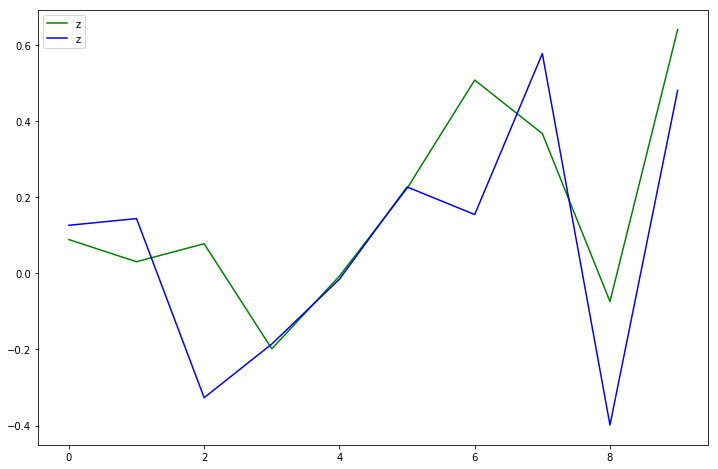

In [129]:
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(10),movelet_dict.z[71], color = 'green')
#plt.plot(range(10),x_testy, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')

#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [ ]:
x_testx = X_test['x'].reset_index(drop = True) 
differences = []
for i in range(movelet_dict.shape[0]):
    mdict_x = movelet_dict['x'][i].reset_index(drop = True)
    diff = np.sum((mdict_x - x_testx)**2)
    differences.append(diff)
    min_loc = differences.index(min(differences))
    min_label = movelet_dict['label'][min_loc]

In [ ]:
movelet_dict

In [ ]:
min_loc

In [ ]:
movelet_dict.label.loc[110]

In [ ]:
#HAsta aca obtuve el label para el eje x, tengo que hacer lo mismo para 'y' y 'z' y definir de acuerdo al que sea mayoritario.
#si tengo los 3 distintos tendria que ver cual es para cada uno el segundo mejor ajuste...

In [ ]:
x_testy = X_test['y'].reset_index(drop = True) 
differences = []
for i in range(movelet_dict.shape[0]):
    mdict_y = movelet_dict['y'][i].reset_index(drop = True)
    diff = np.sum((mdict_y - x_testy)**2)
    differences.append(diff)
    min_loc = differences.index(min(differences))
    min_label = movelet_dict['label'][min_loc]

In [ ]:
movelet_dict.label.loc[min_loc]

In [ ]:
differences[min_loc]

In [ ]:
movelet_dict['index_m'] = range(0,movelet_dict.shape[0])

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(10),movelet_dict.x[9], color = 'grey')
plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(10),movelet_dict.z[9], color = 'green')
plt.plot(range(10),x_testy, color = 'orange')
plt.plot(range(10),x_testx, color = 'black')
plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')

#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [ ]:
movelet_dict.z[9]

In [ ]:
movelet_dict.tail()